In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [5]:
print('total rows in dataset = ',df.shape[0])

total rows in dataset =  5110


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### missing values 

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [9]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# maximum glucose level
df['avg_glucose_level'].max()

271.74

In [11]:
# min glucose level
df['avg_glucose_level'].min()

55.12

#### groupby

In [12]:
df.groupby('gender').size()

gender
Female    2994
Male      2115
Other        1
dtype: int64

##### ----------

In [13]:
# Group the dataset by marital status
dfm=df.groupby('ever_married')
dfm.size()

ever_married
No     1757
Yes    3353
dtype: int64

In [14]:
# all married people
dfm_all = dfm.get_group('Yes')
dfm_all.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [15]:
# married ladies
dfm_ladies=dfm_all[(dfm_all['gender']=='Female')]
dfm_ladies.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


##### ----------

In [16]:
#Group the dataset by smoking status
df_smoke=df.groupby('smoking_status')
df_smoke.size()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64

In [17]:
#Create a new dataframe to view only the smokers
df_smoke.get_group('smokes')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.800000,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.300000,smokes,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.500000,smokes,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.800000,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5082,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.500000,smokes,0
5084,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.900000,smokes,0
5090,4211,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.000000,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,28.893237,smokes,0


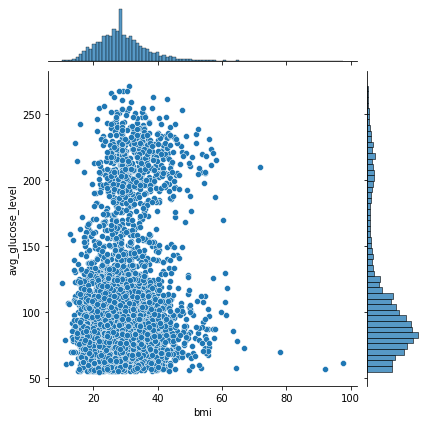

In [18]:
sns.jointplot(x='bmi',y='avg_glucose_level',data=df ,kind='scatter')

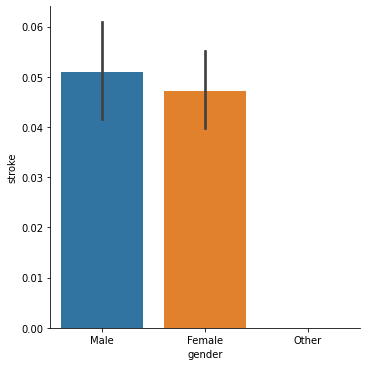

In [19]:
sns.catplot(x="gender", y="stroke", data=df ,kind='bar')

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

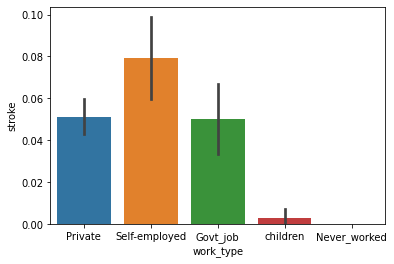

In [20]:
sns.barplot(x="work_type", y="stroke", data=df)

C:\Users\acer\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

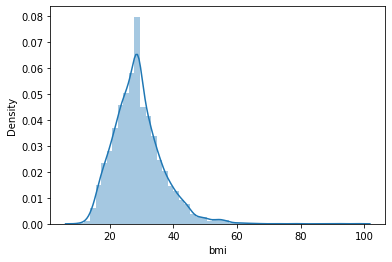

In [21]:
sns.distplot(df['bmi'])

<AxesSubplot:>

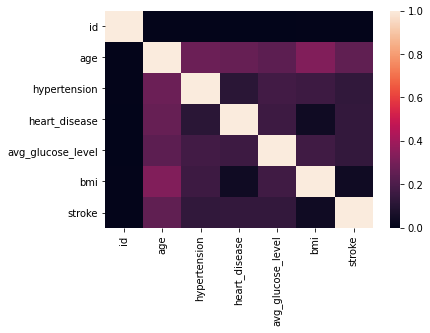

In [22]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='avg_glucose_level'>

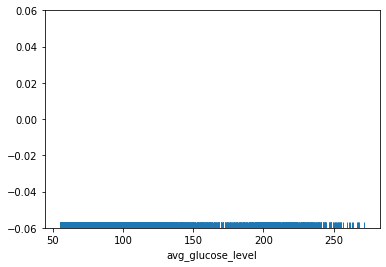

In [25]:
sns.rugplot(df['avg_glucose_level'])